In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [5]:
# Load dataset
df = pd.read_csv("derm.csv")  

In [7]:
# Drop the target column for clustering
X = df.drop(columns=['class'])

In [9]:
# Handle missing values if any
X = X.fillna(X.mean())

In [11]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Create linkage matrix for dendrogram
linked = linkage(X_scaled, method='ward')

In [21]:
# Perform Agglomerative Clustering (choose number of clusters)
n_clusters = 6  # Change this as needed
model = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels = model.fit_predict(X_scaled)

In [31]:
# Add cluster labels to dataframe
df['cluster'] = labels

# Count the number of data points in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Print the counts
print(cluster_counts)

cluster
0    113
1     71
2     46
3     20
4     52
5     64
Name: count, dtype: int64


In [33]:
print(pd.crosstab(df['class'], df['cluster']))

cluster    0   1   2   3   4   5
class                           
1        112   0   0   0   0   0
2          1   0  43   0   0  17
3          0  71   0   0   0   1
4          0   0   3   0   0  46
5          0   0   0   0  52   0
6          0   0   0  20   0   0


In [35]:
print("Yes" if sorted(df['cluster'].values) == sorted(df['class'].values) else "No")

No


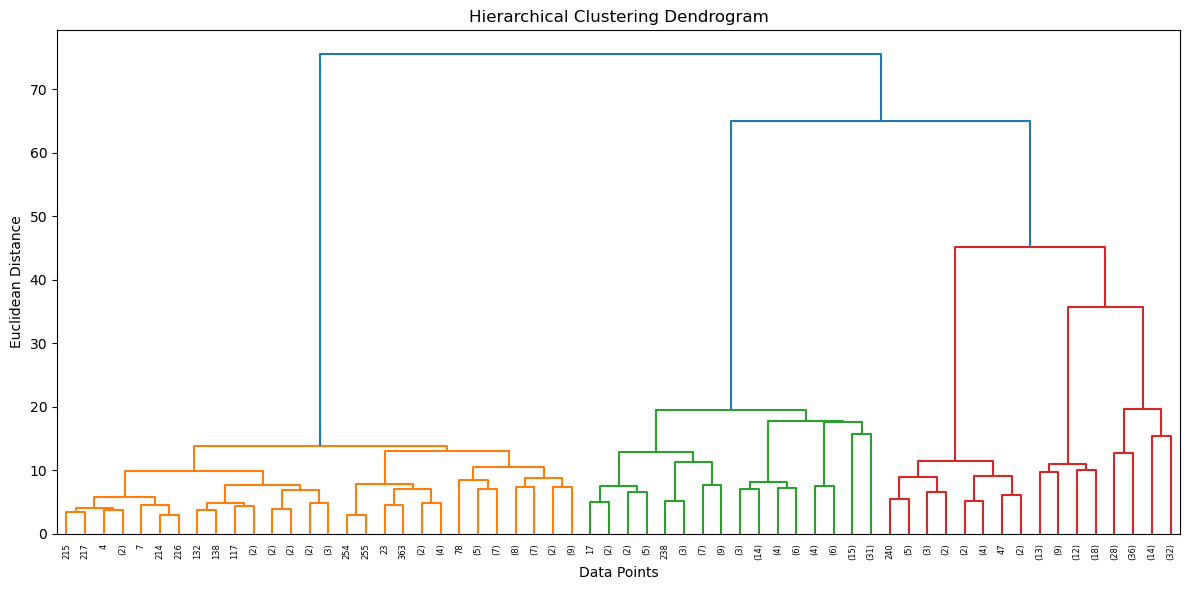

In [37]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()